# Capstone Report #


## King County Housing Sales Data ##

This dataset contains information on home sales between May 2014 and May 2015 for King County, Washington.  King County includes the city of Seattle and the dataset contains a broad spectrum of home types.

This dataset came to me through a Coursera machine learning course run by the University of Washington.
The dataset had been posted to Kaggle and an analysis had also been published on Rpubs.com.  It is important to note that the metadata that is published on Kaggle for the variables sqft_living15 and sqft_lot15 is incorrect.
By reading the rpubs.com report, I have been able to gleen the proper metadata definitions. The metadata referenced below came originally from a glossary of terms from the King County Assessors website. The text below comes from an rpubs.com webreport at https://rpubs.com/grmerrell/154461.  The King County Assessors website has been revamped and the old link is dead.  I haven't found any information about this dataset on the current website.

### Metadata ###
    
**id** - Unique ID for each home sold
    
**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property

**view** - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest 

**condition** - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest 

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

**sqft_above** - The square footage of the interior housing space that is above ground level 

**sqft_basement** - The square footage of the interior housing space that is below ground level 

**yr_built** - The year the house was initially built 

**yr_renovated** - The year of the house’s last renovation 

**zipcode** - The zipcode the house is located in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors 

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Formulate Questions ##

We will attempt to answer 5 questions about the King County housing data using graphical methods.

**Question 1.** The variables bedrooms, bathrooms, sqft_living, and sqft_lot can obviously be connected to the value of a house. Note that price, sqft_living, and sqft_lot are all positive variables.  Can we see any particular functional forms connecting these variables with price?  Are there any functional transformation we should apply in order to better model these relationships?


**Question 2.** We have an indicator variable for waterfront property.  What is the overall additive value of waterfront property while controlling for other important house characteristics?

**Question 3.** Can we quantify the value of renovations on a property?

**Question 4.** How correlated are the variables view, condition, and grade?  Can we find out if each are useful in determining house prices or are only some of these variables worth using? 

**Question 5.** The attributes SqFt_living15 and SqFt_lot15 give us information on a house's local neighborhood.  Are houses that are larger than their average neighborhood in living space valued more than houses that are smaller than their neighboring houses after normalizing on a measure of house size such as number of bedrooms? 

## Import Libraries and Read Data ##

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.columns = ['id','date','price','bedrooms','bathrooms','sqft_living',
              'sqft_lot','floors','waterfront','view','condition','grade',
              'sqft_above','sqft_basement','yr_built','yr_renovated','zipcode',
              'lat','long','sqft_living15','sqft_lot15']

Let's take a look at the top of the dataset.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1 ###

*The variables bedrooms, bathrooms, sqft_living, and sqft_lot can obviously be connected to the value of a house. Note that price, sqft_living, and sqft_lot are all positive variables.  Can we see any particular functional forms connecting these variables with price?  Are there any functional transformation we should apply in order to better model these relationships?*

There is an intuitive connection between the number of bedrooms, bathrooms, and house size with the overall house value. Let's investigate the graphical relationship between variables like Sq. Ft. of living space and number of bedrooms.  Number of bathrooms is likely to be proportionate with the number of bedrooms.

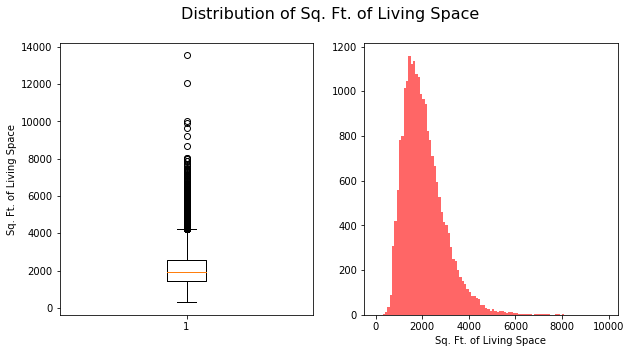

In [4]:
plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.boxplot(df['sqft_living'])
plt.ylabel('Sq. Ft. of Living Space')


plt.subplot(1, 2, 2)
plt.hist(df['sqft_living'], color='red', bins=np.arange(0, 10000, 100), alpha=.6)
plt.xlabel('Sq. Ft. of Living Space')


plt.suptitle('Distribution of Sq. Ft. of Living Space', fontsize=16)
plt.show()

SqFt_living is a positive variable that is skewed right like a lognormal.  Due to it's similarity to a lognormal distribution we should investigate using a log transformation.  We will need to add columns to hold our data transformations.  Next, we use boxplots to investigate the relationship of bedrooms to sqft_living.

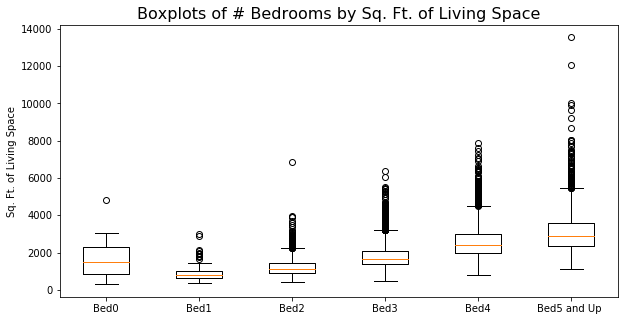

In [5]:
plt.figure(figsize=(10, 5)) 
l0 = df[df['bedrooms'] == 0]['sqft_living']
l1 = df[df['bedrooms'] == 1]['sqft_living']
l2 = df[df['bedrooms'] == 2]['sqft_living']
l3 = df[df['bedrooms'] == 3]['sqft_living']
l4 = df[df['bedrooms'] == 4]['sqft_living']
l5 = df[df['bedrooms'] >= 5]['sqft_living']
size_bed_data = [l0, l1, l2, l3, l4, l5]
plt.boxplot(size_bed_data)
plt.title('Boxplots of # Bedrooms by Sq. Ft. of Living Space', fontsize=16)
plt.ylabel('Sq. Ft. of Living Space')
plt.xticks([1,2,3,4,5,6],['Bed0', 'Bed1', 'Bed2', 'Bed3', 'Bed4',"Bed5 and Up "])
plt.show()

In [6]:
len(l0)

13

As expected, homes with more bedrooms are associated with greater living space. There is also evidence of large unimproved properties (land sales) and/or buildings like garages (zero beds?) in the data set.  The number of bedrooms is zero for 13 properties.  Not a large percentage in such a large dataset but interesting nonetheless.   Now let's look at lot size and begin to correlate these variables with price.

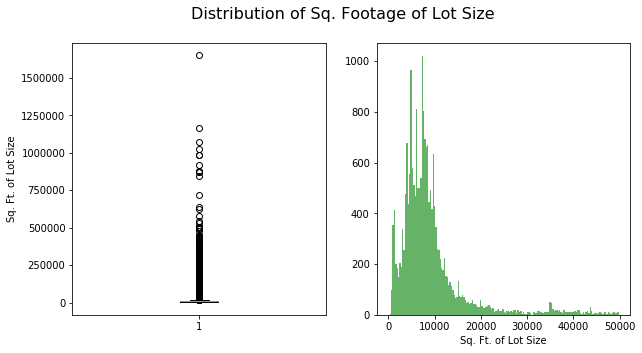

In [7]:
plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.boxplot(df['sqft_lot'])
plt.ylabel('Sq. Ft. of Lot Size')


plt.subplot(1, 2, 2)
plt.hist(df['sqft_lot'], color='green', bins=np.arange(0, 50000, 300), alpha=.6)
plt.xlabel('Sq. Ft. of Lot Size')


plt.suptitle('Distribution of Sq. Footage of Lot Size', fontsize=16)
plt.show()

There are a number of huge lots in this data. However most of the sales are from lots of less than 10000 sq.ft. in size.  Lot size is a positive valued variable naturally and the distribution is highly skewed and possible multimodal.  It's important to note that Seattle is only a small portion of the total land size of King County.  The eastern half of the county is rural in nature.  Seattle lot sizes are smaller in general and are responsible for the spike around 2000 sq. ft.

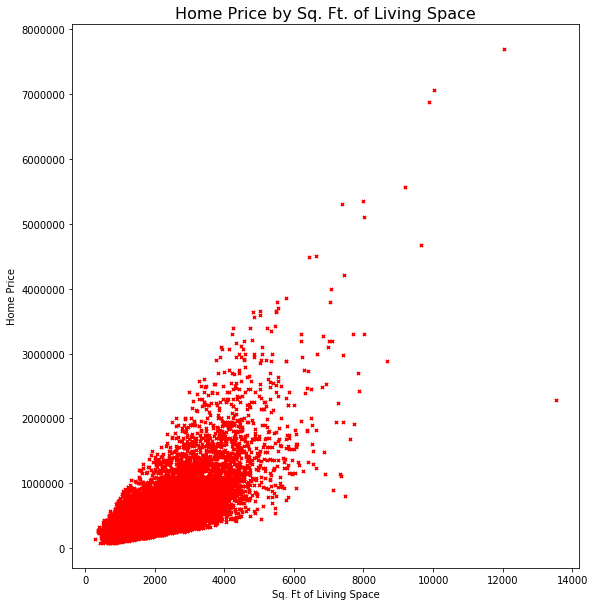

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

x1 = df['sqft_living']
y1 = df['price']
plt.scatter(
    x=x1,
    y=y1,
    color='r',
    marker='x', s=10)
plt.title('Home Price by Sq. Ft. of Living Space', fontsize=16)
plt.ylabel('Home Price')
plt.xlabel('Sq. Ft of Living Space')
plt.show()

We can see that variance of house prices increases dramatically as living space increases. Price and Sqft_living most likely need a log transform to stabilize the variance.

In [9]:
df['lnliving'] = np.log(df['sqft_living'].astype('float64'))
df['lnprice'] = np.log(df['price'].astype('float64'))                     

Now we will redo the above plot using these simple transformations.

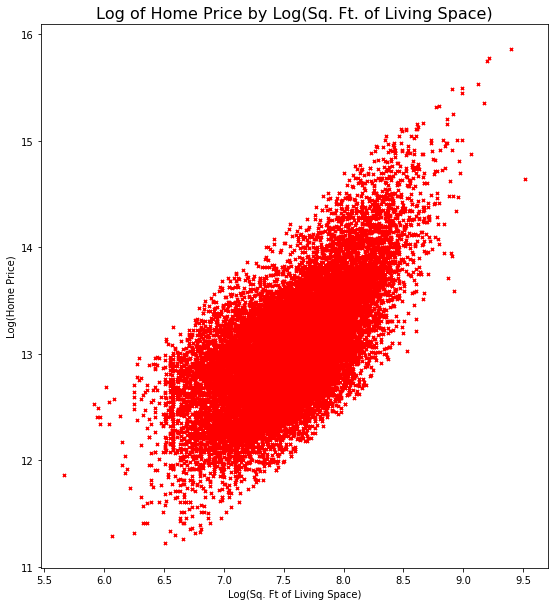

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

x1 = df['lnliving']
y1 = df['lnprice']
plt.scatter(
    x=x1,
    y=y1,
    color='r',
    marker='x', s=10)
plt.title('Log of Home Price by Log(Sq. Ft. of Living Space)', fontsize=16)
plt.ylabel('Log(Home Price)')
plt.xlabel('Log(Sq. Ft of Living Space)')
plt.show()

The point cloud is much tighter and shows a nice linear correlation between the variables after the log transformations.  One question is how does the number of bedrooms vary with the log of home prices?

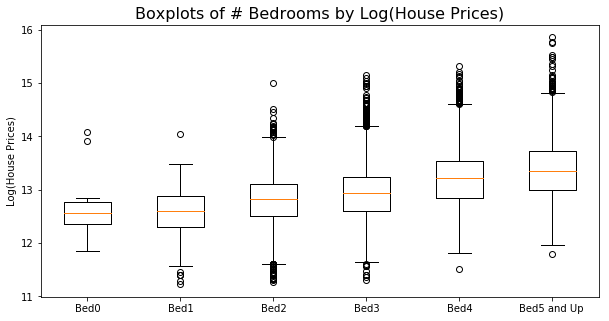

In [11]:
plt.figure(figsize=(10, 5)) 
lp0 = df[df['bedrooms'] == 0]['lnprice']
lp1 = df[df['bedrooms'] == 1]['lnprice']
lp2 = df[df['bedrooms'] == 2]['lnprice']
lp3 = df[df['bedrooms'] == 3]['lnprice']
lp4 = df[df['bedrooms'] == 4]['lnprice']
lp5 = df[df['bedrooms'] >= 5]['lnprice']
price_bed_data = [lp0, lp1, lp2, lp3, lp4, lp5]
plt.boxplot(price_bed_data)
plt.title('Boxplots of # Bedrooms by Log(House Prices)', fontsize=16)
plt.ylabel('Log(House Prices)')
plt.xticks([1,2,3,4,5,6],['Bed0', 'Bed1', 'Bed2', 'Bed3', 'Bed4',"Bed5 and Up "])
plt.show()

Bedrooms has a definite monotonic increasing relationship with log(house prices).  There are a number of outliers associated with each level of the bedrooms variable.  Now we investigate the relationship of prices with lot size. 

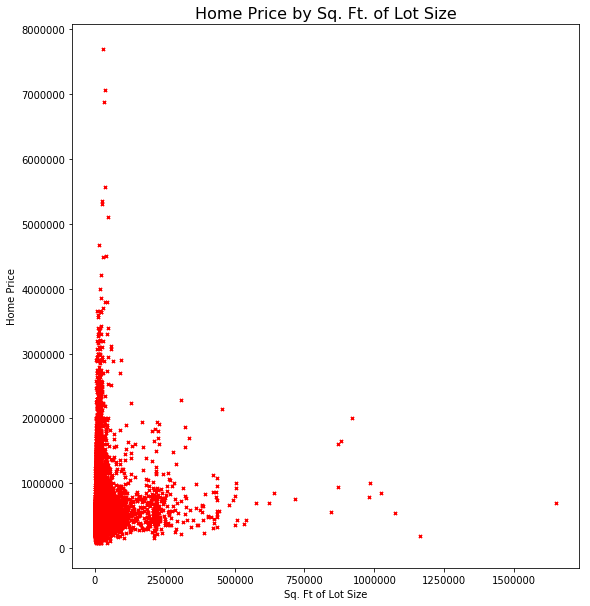

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

x1 = df['sqft_lot']
y1 = df['price']
plt.scatter(
    x=x1,
    y=y1,
    color='r',
    marker='x', s=10)
plt.title('Home Price by Sq. Ft. of Lot Size', fontsize=16)
plt.ylabel('Home Price')
plt.xlabel('Sq. Ft of Lot Size')
plt.show()

This is a complicated relationship.  There are mansions with relatively small lot size but a high price and huge land plots with relatively modest value. Let's do the same as we did above with Sqft_living and apply a log transform.


In [13]:
df['lnlot'] = np.log(df['sqft_lot'].astype('float64'))

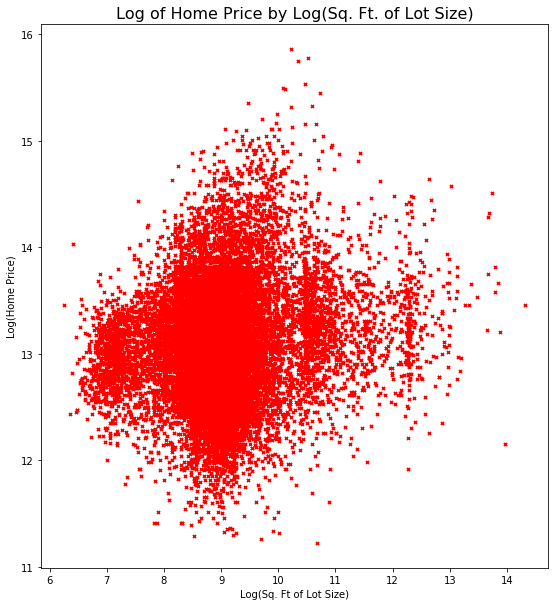

In [14]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

x1 = df['lnlot']
y1 = df['lnprice']
plt.scatter(
    x=x1,
    y=y1,
    color='r',
    marker='x', s=10)
plt.title('Log of Home Price by Log(Sq. Ft. of Lot Size)', fontsize=16)
plt.ylabel('Log(Home Price)')
plt.xlabel('Log(Sq. Ft of Lot Size)')
plt.show()

I see some clusters in the data that should most likely be handled using dummy variables (Geographic) in future work. However the overall look of the data cloud looks far more bivariate Normal than it did previously without the log transformation.  

#### Summary for Question 1 ####

* Distribution of living space and lot size are skewed to the right and lognormal in shape.

* There are some properties with zero bedrooms and quite a number with large lot sizes.

* As expected, greater number of bedrooms is associated with a greater sized living area.

* There is a smoothly increasing relationship on average between number of bedrooms and home price.

* Log tranformations have been shown to stabilize the variance of the relationship between living space and price.

* There is a strong linear relationship between log of living space and log of home value.

### Question 2 ###

 *We have an indicator variable for waterfront property.  What is the overall additive value of waterfront property controlling for other important house characteristics?*

Let's look at the waterfront variable by itself.

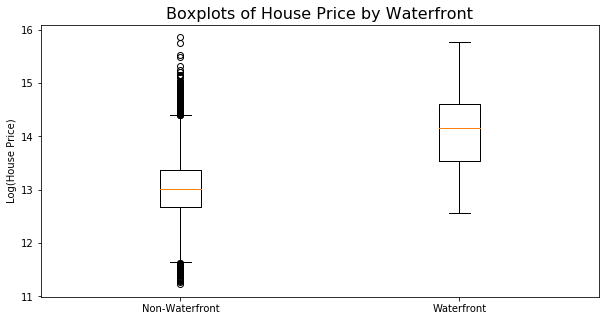

In [15]:
plt.figure(figsize=(10, 5)) 
wv0 = df[df['waterfront'] == 0]['lnprice']
wv1 = df[df['waterfront'] == 1]['lnprice']

waterview_data = [wv0, wv1]
plt.boxplot(waterview_data)
plt.title('Boxplots of House Price by Waterfront', fontsize=16)
plt.ylabel('Log(House Price)')
plt.xticks([1,2],['Non-Waterfront', 'Waterfront'])
plt.show()

Waterfront property has a higher IQR than non-waterfront property. This is expected; however, there are a great number of outliers in the non-waterfront properties.  We can see that often extremely expensive homes are built away from the water along with many rather inexpensive properties.

Lets investigate the outliers of the non-waterfront properties and list their zipcodes.  From Google, we can get demographics of the zipcodes and add some important nuances to the dataset.

In [16]:
NW =  df[df['waterfront'] == 0]
HiNW = NW[NW['lnprice'] > 15]
HiNWzips = HiNW['zipcode']

In [17]:
LowNW = NW[NW['lnprice'] < 11.5]
LowNWzips = LowNW['zipcode']

In [18]:
sethizips = set(HiNWzips)
setlowzips = set(LowNWzips)
INWzips = sethizips.intersection(setlowzips)

In [19]:
print(setlowzips)

{98146, 98178, 98022, 98023, 98058, 98092, 98032, 98002, 98034, 98198, 98168, 98106, 98108, 98014}


The zipcodes associated with extremely low valued property have an average per capita income of $32,700.

In [20]:
print(sethizips)

{98112, 98177, 98039, 98004, 98006, 98102}


These zipcodes have extremely high per-capita incomes that average over twice the amount of the low extreme zipcodes we found above.  These high income levels are obviously supporting far higher home prices.

#### Summary of Per-capita Income from Low and High Value Outliers of Non-Waterfront Property ####

High Outlier Average Per-Capita Income by Zipcode - $32,700

Low Outlier Average Per-Capita Income by Zipcode - $70,300



In [21]:

hizipNW = df[df['zipcode'].isin(sethizips)]['lnprice']
lowzipNW = df[df['zipcode'].isin(setlowzips)]['lnprice']



In [22]:
NWzip_data = [hizipNW, lowzipNW]

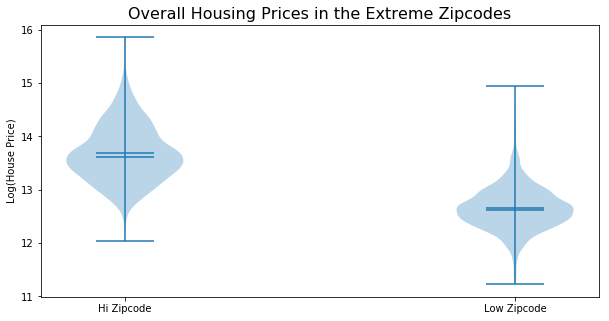

In [23]:
plt.figure(figsize=(10, 5))
plt.violinplot(NWzip_data,[1,2],widths=0.3,showmeans=True, showextrema=True, showmedians=True)
plt.title('Overall Housing Prices in the Extreme Zipcodes', fontsize=16)
plt.ylabel('Log(House Price)')
plt.xticks([1,2],['Hi Zipcode', 'Low Zipcode'])
plt.show()

We can see from the above violin plot that the extreme zipcodes we found from analyzing non-waterfront property are quite
informative overall for our dataset. Overall, this has led us to discover the importance of the zipcode attribute in determining housing prices.

#### Summary for Question 2 ####

* Waterfront property appears to have an advantage in the housing market.

* Non-waterfront property contains a large number of outliers both on the highside and lowside of house valuation.

* Analyzing the zipcodes associated with these outliers leads to the discovery that zipcodes can be highly informative with respect to housing value in the overall dataset.

* Recommendation is to use zipcodes as dummy variables in a future regression.

### Question 3 ###

*Can we quantify the value of renovations on a property?*

Many of the properties are provided with a year of rennovation.  It is logical that rennovated properties will have an advantage in the housing market.

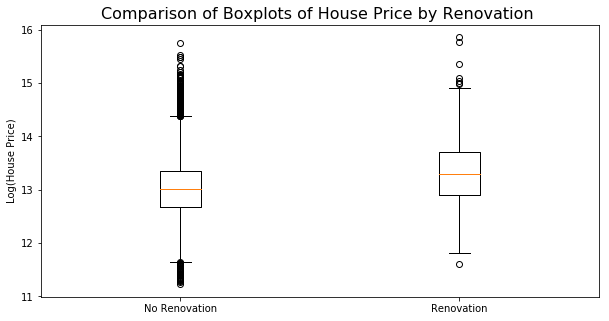

In [24]:
plt.figure(figsize=(10, 5)) 
rn0 = df[df['yr_renovated'] == 0]['lnprice']
rn1 = df[df['yr_renovated'] > 0]['lnprice']

renovate_data = [rn0, rn1]
plt.boxplot(renovate_data)
plt.title('Comparison of Boxplots of House Price by Renovation ', fontsize=16)
plt.ylabel('Log(House Price)')
plt.xticks([1,2],['No Renovation', 'Renovation'])
plt.show()

Renovated properties appear to have an advantage in price over unrenovated properties. I will now break down if there is a price advantage to more recent renovations.

In [25]:
df['Renov_age'] = 2015 - df['yr_renovated'].astype('int')

In [26]:
ren1 = df[(df['Renov_age'] >= 0) & (df['Renov_age'] <= 5)]['lnprice']
ren2 = df[(df['Renov_age'] > 5) & (df['Renov_age'] <= 15)]['lnprice']
ren3 = df[(df['Renov_age'] > 15) & (df['Renov_age'] <= 200)]['lnprice']
ren4 = df[df['Renov_age'] == 2015]['lnprice']

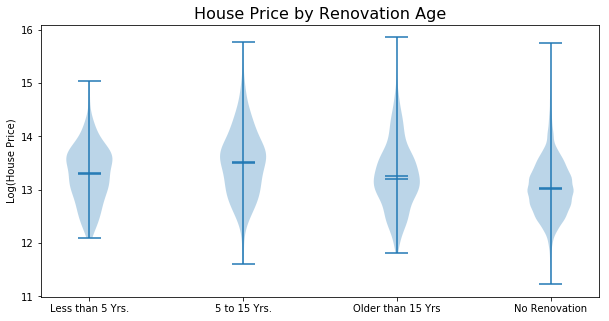

In [27]:
plt.figure(figsize=(10, 5))
ren_data = [ren1, ren2, ren3, ren4]
plt.violinplot(ren_data,[1,2,3,4],widths=0.3,showmeans=True, showextrema=True, showmedians=True)
plt.title('House Price by Renovation Age', fontsize=16)
plt.ylabel('Log(House Price)')
plt.xticks([1,2,3,4],['Less than 5 Yrs.','5 to 15 Yrs.','Older than 15 Yrs', 'No Renovation'])
plt.show()

Age of renovation is not a greatly informative variable. More recent renovations appear to be associated with greater home value but the strenght of association is relatively weak.

#### Summary of Question 3 ####

* Renovated properties have a small price advantage in the housing market.

* Age of renovation is not greatly informative but the more recent the renovation the greater the house price. 

### Question 4 ###

*How correlated are the variables view, condition, and grade? Can we find out if each are useful in determining house prices or are only some of these variables worth using?*

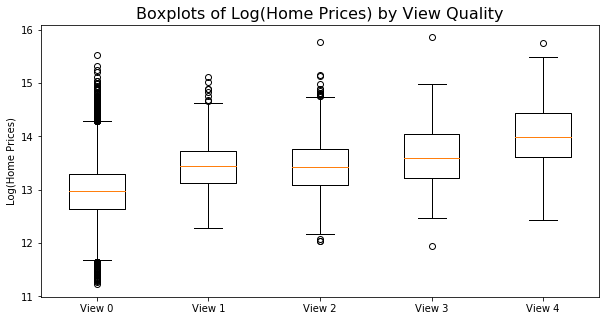

In [28]:
plt.figure(figsize=(10, 5)) 
v0 = df[df['view'] == 0]['lnprice']
v1 = df[df['view'] == 1]['lnprice']
v2 = df[df['view'] == 2]['lnprice']
v3 = df[df['view'] == 3]['lnprice']
v4 = df[df['view'] == 4]['lnprice']

view_data = [v0, v1, v2,v3, v4]
plt.boxplot(view_data)
plt.title('Boxplots of Log(Home Prices) by View Quality', fontsize=16)
plt.ylabel("Log(Home Prices)")
plt.xticks([1,2,3,4,5],['View 0', 'View 1', 'View 2', 'View 3', 'View 4'])
plt.show()

 There is a near monotonic relationship between view quality and home prices.  The greatest information would seem to be in the extremes.  It is likely that the view grades of 1, 2 and 3 were given randomly but view 0 and view 4 properties stand out significantly.

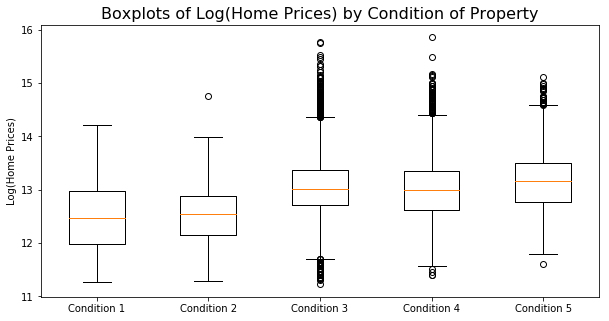

In [29]:
plt.figure(figsize=(10, 5)) 

c1 = df[df['condition'] == 1]['lnprice']
c2 = df[df['condition'] == 2]['lnprice']
c3 = df[df['condition'] == 3]['lnprice']
c4 = df[df['condition'] == 4]['lnprice']
c5 = df[df['condition'] == 5]['lnprice']

condition_data = [c1, c2, c3, c4, c5]
plt.boxplot(condition_data)
plt.title('Boxplots of Log(Home Prices) by Condition of Property', fontsize=16)
plt.ylabel("Log(Home Prices)")
plt.xticks([1,2,3,4,5],['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4', 'Condition 5'])
plt.show()

Condition information is much less clear cut.  It appears to be more useful to think of Condition 1 and 2 as poor and condition 3, 4, and 5 as good.  This could again be evidence that the reviewer of the property gives condition grades randomly unless the property stands out in a significant manner.

In [30]:
df['midgrade'] = ((df['grade']>=6) & (df['grade'] <= 8))

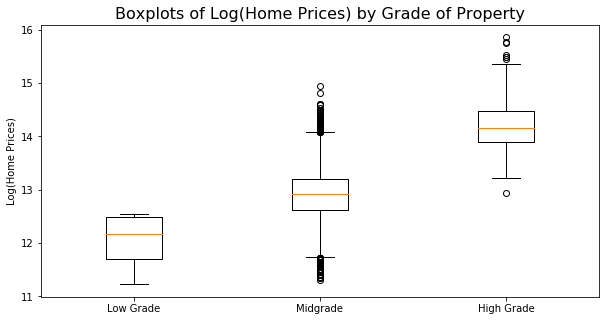

In [31]:
plt.figure(figsize=(10, 5)) 

g1 = df[df['grade'] < 4]['lnprice']
g2 = df[df['midgrade'] > 0]['lnprice']
g3 = df[df['grade'] > 10 ]['lnprice']


grade_data = [g1, g2, g3]
plt.boxplot(grade_data)
plt.title('Boxplots of Log(Home Prices) by Grade of Property', fontsize=16)
plt.ylabel("Log(Home Prices)")
plt.xticks([1,2,3],['Low Grade', 'Midgrade', 'High Grade'])
plt.show()

This is a far more informative attribute. I pooled grades 1-3 as low grade, midgrade is grades 6-8, while the highest grade properties were in grades 11 to 13.

Now let's use categorical heatmaps to investigate the internal structure of these related variables.

In [32]:
overall_mean = df['lnprice'].mean()

In [33]:
view_cond_table = pd.pivot_table(df, values='lnprice', index=['condition'], 
                                 columns=['view'],fill_value=overall_mean)

In [34]:
view_cond_table

view,0,1,2,3,4
condition,,,,,
1,12.455790,12.594731,13.047817,13.047817,12.917072
2,12.511290,13.592367,13.469834,12.838629,13.047817
3,13.004924,13.486373,13.440160,13.629403,14.040347
4,12.947349,13.388816,13.391626,13.607952,13.961864
5,13.074804,13.559513,13.539151,13.776778,14.117027


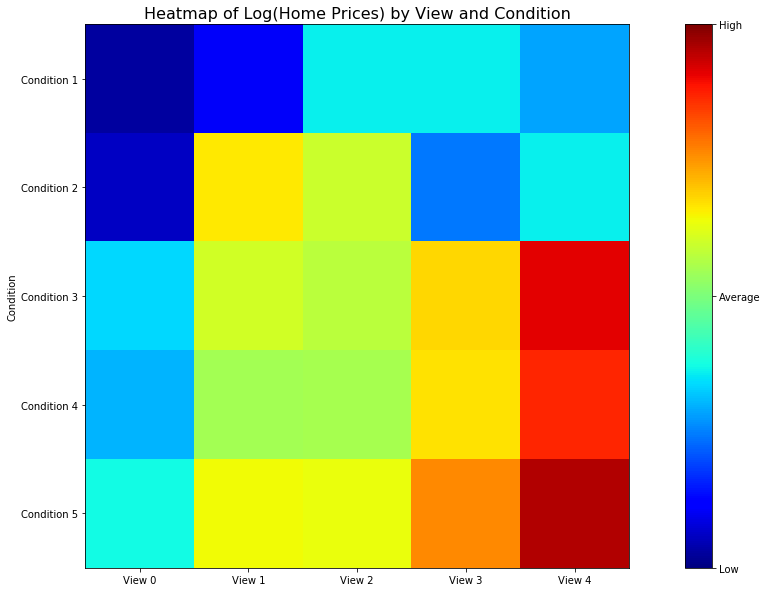

In [35]:
plt.figure(figsize=(20, 10)) 


plt.imshow(view_cond_table, interpolation='none', aspect=1./1, vmin=12.4, vmax=14.2)

plt.title('Heatmap of Log(Home Prices) by View and Condition', fontsize=16)
plt.ylabel("Condition")
plt.yticks([0,1,2,3,4], ['Condition 1','Condition 2','Condition 3','Condition 4','Condition 5'])
plt.xticks([0,1,2,3,4],['View 0', 'View 1', 'View 2', 'View 3','View 4'])

plt.jet()
cb = plt.colorbar()
cb.set_ticks([12.4, 13.3, 14.2])  # force there to be only 3 ticks
cb.set_ticklabels(['Low', 'Average', 'High'])  
plt.show()

Properties with View 0 or Condition 1 have a lower than average value.  View 3 and 4 properties with condition 3-5 have higher than average value.  All other properties are average in value. 

In [36]:
view_grade_table = pd.pivot_table(df, values='lnprice', index=['grade'], 
                                 columns=['view'],fill_value=overall_mean)

In [37]:
view_grade_table

view,0,1,2,3,4
grade,,,,,
1,11.863582,13.047817,13.047817,13.047817,13.047817
3,12.081296,13.047817,13.047817,13.047817,13.047817
4,12.119168,12.635377,12.779873,13.047817,13.047817
5,12.298546,12.714706,12.602210,12.577636,13.064558
6,12.529149,12.813009,12.841187,12.862515,13.181804
7,12.823116,13.129442,13.057064,13.053475,13.513431
8,13.099109,13.422416,13.361037,13.450536,13.797610
9,13.444067,13.703136,13.604952,13.710040,13.877238
10,13.726265,13.970401,13.859185,14.063764,14.315873


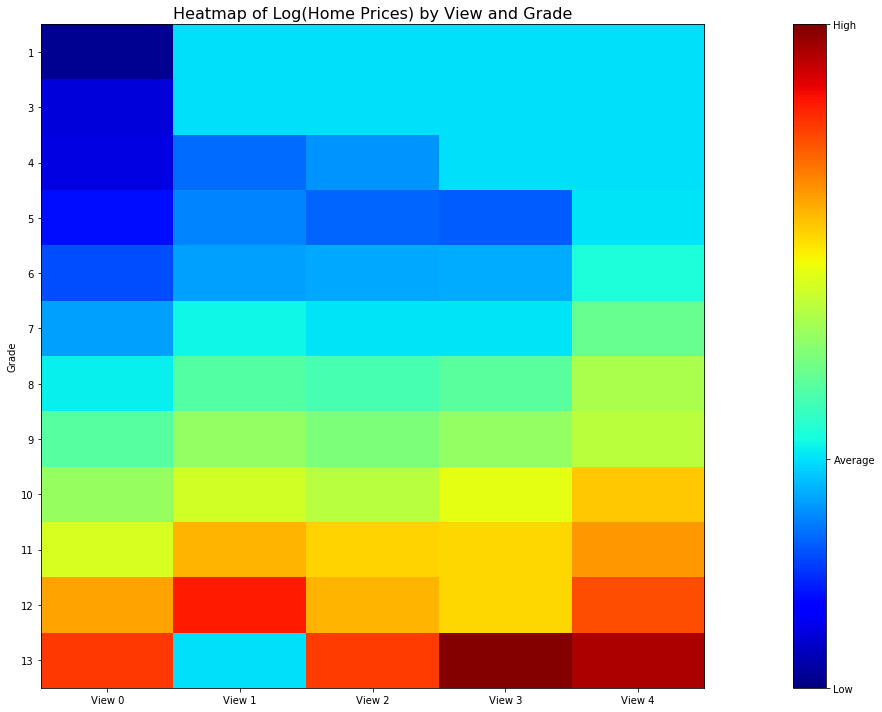

In [38]:
plt.figure(figsize=(25, 10)) 


plt.imshow(view_grade_table, interpolation='none', aspect=5./12, vmin=11.8, vmax=15.4)

plt.title('Heatmap of Log(Home Prices) by View and Grade', fontsize=16)
plt.ylabel("Grade")
plt.yticks(range(12), ['1','3','4','5','6','7','8','9','10','11','12','13'])
plt.xticks([0,1,2,3,4],['View 0', 'View 1', 'View 2', 'View 3','View 4'])

plt.jet()
cb = plt.colorbar()
cb.set_ticks([11.8, 13.04, 15.4])  # force there to be only 3 ticks
cb.set_ticklabels(['Low', 'Average', 'High'])
plt.tight_layout()
plt.show()

The grade variable does an excellent job of differentiating property values. The top left quadrant (View 0 and low grade) has very low levels of home value.  There is some evidence that high grade properties with a view of 3 and 4 have an even higher property value on average.

In [39]:
condition_grade_table = pd.pivot_table(df, values='lnprice', index=['grade'], 
                                 columns=['condition'],fill_value=overall_mean)

In [40]:
condition_grade_table

condition,1,2,3,4,5
grade,,,,,
1,11.863582,13.047817,13.047817,13.047817,13.047817
3,13.047817,12.542545,11.225243,13.047817,12.476100
4,11.918391,11.979640,12.168297,12.314455,13.047817
5,12.248797,12.138174,12.297762,12.345604,12.444910
6,12.539787,12.378553,12.509717,12.597384,12.577540
7,12.624627,12.649111,12.799826,12.857422,13.014057
8,13.514314,12.890796,13.083536,13.209679,13.453409
9,13.047817,13.461888,13.434032,13.619887,13.880241
10,13.047817,14.258890,13.756138,13.892999,14.307916


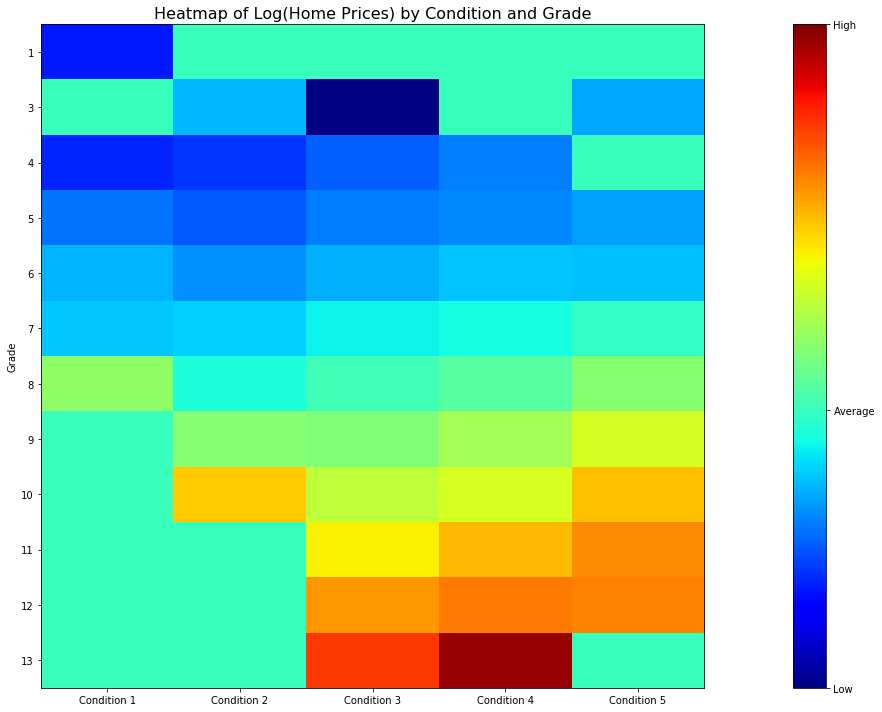

In [41]:
plt.figure(figsize=(25, 10)) 


plt.imshow(condition_grade_table, interpolation='none', aspect=5./12, vmin=11.2, vmax=15.6)

plt.title('Heatmap of Log(Home Prices) by Condition and Grade', fontsize=16)
plt.ylabel("Grade")
plt.yticks(range(12), ['1','3','4','5','6','7','8','9','10','11','12','13'])
plt.xticks([0,1,2,3,4],['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4','Condition 5'])

plt.jet()
cb = plt.colorbar()
cb.set_ticks([11.2, 13.04, 15.6])  # force there to be only 3 ticks
cb.set_ticklabels(['Low', 'Average', 'High'])
plt.tight_layout()
plt.show()

In general, properties of condition 1 or 2 are of low value regardless of grade.  Properties in the lower right quadrant (high grade and condition >=3) have higher than average value.

#### Summary of Question 4 ####

* The grade variable is a very strong predictor of house prices.

* Condition and View by themselves are useful only at the extremes.

* Grade, Condition, and View have powerful predictive interactions that should be made into dummy variables for a future regression.

* Grade and Condition in the lower right quadrant of the heat map have much greater than average home prices.

* View and Grade in the top right quadrant have much lower home values than average.

### Question 5 ###

*The attributes SqFt_living15 and SqFt_lot15 give us information on a house's local neighborhood. Are houses that are larger than their average neighborhood in living space valued more than houses that are smaller than their neighboring houses after normalizing on a measure of house size such as number of bedrooms?*

We will only analyze Sqft_living15 as it is likely to be more informative than lot size.

In [42]:
df['big_neighbors'] = (df['sqft_living'] < df['sqft_living15']) 

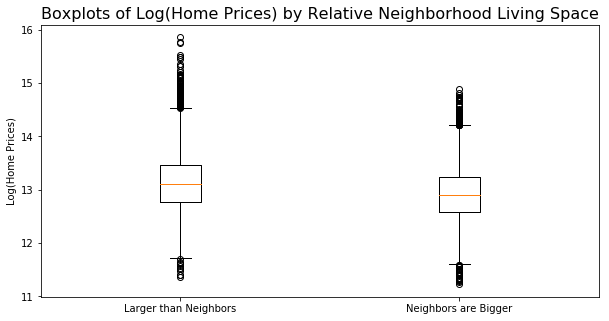

In [43]:
plt.figure(figsize=(10, 5)) 

bn1 = df[df['big_neighbors'] == 0]['lnprice']
bn2 = df[df['big_neighbors'] > 0]['lnprice']



neighbor_living_data = [bn1, bn2]
plt.boxplot(neighbor_living_data)
plt.title('Boxplots of Log(Home Prices) by Relative Neighborhood Living Space', fontsize=16)
plt.ylabel("Log(Home Prices)")
plt.xticks([1,2],['Larger than Neighbors', 'Neighbors are Bigger'])
plt.show()

There is anecdotal evidence that a smaller house in a larger neighborhood has a price advantage over the same house with a local neighborhood of smaller houses.  The above graph is consistent only with the fact that a house larger than it's neighbors is likely just a larger house than average.  We need to put houses on an even basis to measure the local neighborhood effect.  Let's create a heatmap for average log(price) by the number of bedrooms and neighborhood size.

In [44]:
nb_neighbors_table = pd.pivot_table(df, values='lnprice', index=['bedrooms'], 
                                 columns=['big_neighbors'],fill_value=overall_mean)

In [45]:
nb_neighbors_table

big_neighbors,False,True
bedrooms,,
0,13.025861,12.389959
1,12.777990,12.544750
2,12.904363,12.757221
3,12.999519,12.874696
4,13.241115,13.172193
5,13.388100,13.396315
6,13.405352,13.386587
7,13.547328,13.047817
8,13.654096,13.047817


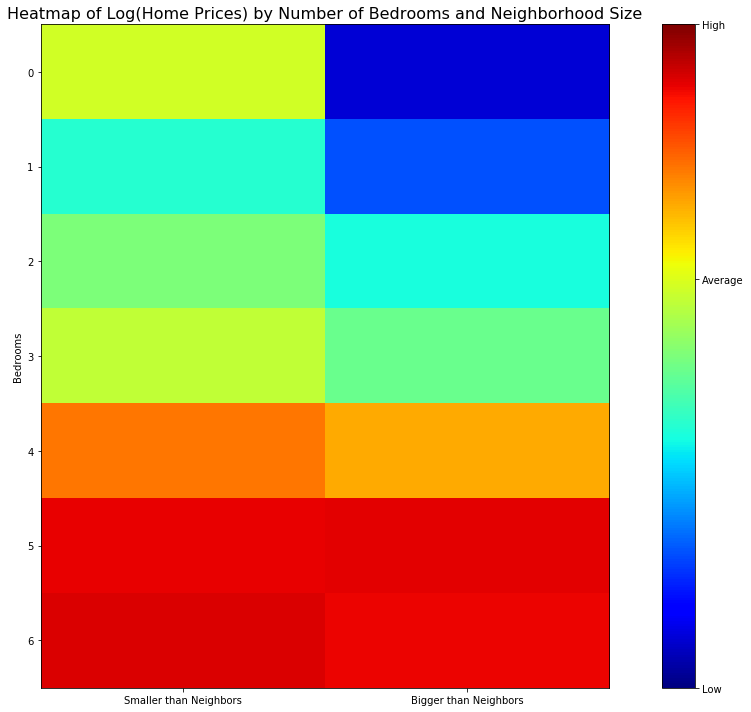

In [46]:
plt.figure(figsize=(15, 10)) 


plt.imshow(nb_neighbors_table.iloc[0:7], interpolation='none', aspect=2./6, vmin=12.3, vmax=13.5)

plt.title('Heatmap of Log(Home Prices) by Number of Bedrooms and Neighborhood Size', fontsize=16)
plt.ylabel("Bedrooms")
plt.yticks(range(7), ['0','1','2','3','4','5','6'])
plt.xticks([0,1],['Smaller than Neighbors', 'Bigger than Neighbors'])

plt.jet()
cb = plt.colorbar()
cb.set_ticks([12.3, 13.04, 13.5])  # force there to be only 3 ticks
cb.set_ticklabels(['Low', 'Average', 'High'])
plt.tight_layout()
plt.show()

#### Summary of Question 5 ####

* Overall the local neighborhood effect appears to be true.

* The heatmap shows that houses that are smaller than neighbors have a price advantage *if* the number of bedrooms is less than 5.

* Larger houses (bedrooms >=5) do not seem to be subject to the local neighborhood effect.